In [1]:
# Sample imbalanced Datasets
from sklearn.datasets import make_classification

In [2]:
# X: Input data/ Independent features
# Y: Ouput data/ Target features
X,y = make_classification(n_samples=1000, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=1, n_redundant=0)

In [4]:
X

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]], shape=(1000, 2))

In [5]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
import pandas as pd
df1 = pd.DataFrame(X, columns=['F1', 'F2'])
df2 = pd.DataFrame(y, columns=['Target'])

In [7]:
df1

,F1,F2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
995,2.210439,2.006772
996,1.910941,2.011860
997,-0.556625,-0.159837
998,1.004999,0.936290


In [8]:
df2

,Target
0,1
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [12]:
df = pd.concat([df1, df2], axis=1)

In [13]:
df.head()

,F1,F2,Target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [15]:
df['Target'].value_counts()

Target
0    894
1    106
Name: count, dtype: int64

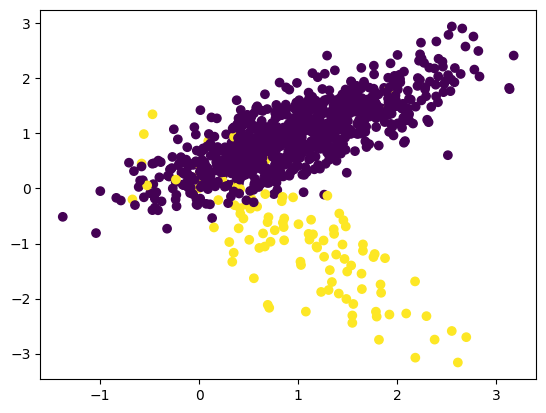

In [17]:
import matplotlib.pyplot as plt
plt.scatter(df['F1'], df['F2'], c=df['Target'])

# SMOTE

In [18]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [19]:
from imblearn.over_sampling import SMOTE

In [36]:
# transform the datasets
oversample = SMOTE()
X,y = oversample.fit_resample(df[['F1', 'F2']], df['Target'])

In [37]:
X.shape

(1788, 2)

In [38]:
X

,F1,F2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
1783,0.588427,-0.995180
1784,1.364370,-0.824839
1785,1.253103,-0.829215
1786,-0.152023,0.179008


In [39]:
y.shape

(1788,)

In [40]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1783    1
1784    1
1785    1
1786    1
1787    1
Name: Target, Length: 1788, dtype: int64

In [41]:
y.value_counts()

Target
1    894
0    894
Name: count, dtype: int64

In [45]:
type(X)

pandas.core.frame.DataFrame

In [46]:
type(y)

pandas.core.series.Series

In [44]:
pd.DataFrame(X, columns=['f1', 'f2'])

,f1,f2
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1783,NaN,NaN
1784,NaN,NaN
1785,NaN,NaN
1786,NaN,NaN


In [47]:
pd.DataFrame(y)

,Target
0,1
1,0
2,0
3,0
4,0
...,...
1783,1
1784,1
1785,1
1786,1


In [48]:
df2 = pd.DataFrame(y)
oversampled_df = pd.concat([X, df2], axis=1)

In [49]:
oversampled_df

,F1,F2,Target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,0.588427,-0.995180,1
1784,1.364370,-0.824839,1
1785,1.253103,-0.829215,1
1786,-0.152023,0.179008,1


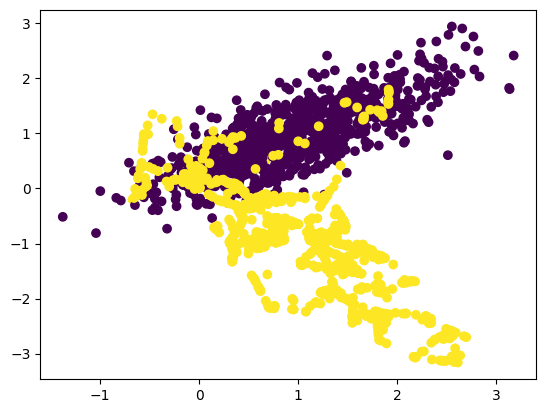

In [52]:
plt.scatter(oversampled_df['F1'], oversampled_df['F2'], c=oversampled_df['Target'])